# Importing the neccessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# About Dataset
### Context
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.
The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.
content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients.

In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

 - sex: 1 for female and 2 for male.
 - age: of the patient.
 - classification: covid test findings. Values 1-3 mean that the patient was diagnosed with  covid in different
 - degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
 - patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
 - pneumonia: whether the patient already have air sacs inflammation or not.
 - pregnancy: whether the patient is pregnant or not.
 - diabetes: whether the patient has diabetes or not.
 - copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
 - asthma: whether the patient has asthma or not.
 - inmsupr: whether the patient is immunosuppressed or not.
 - hypertension: whether the patient has hypertension or not.
 - cardiovascular: whether the patient has heart or blood vessels related disease.
 - renal chronic: whether the patient has chronic renal disease or not.
 - other disease: whether the patient has other disease or not.
 - obesity: whether the patient is obese or not.
 - tobacco: whether the patient is a tobacco user.
 - usmr: Indicates whether the patient treated medical units of the first, second or third level.
 - medical unit: type of institution of the National Health System that provided the care.
 - intubed: whether the patient was connected to the ventilator.
 - icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
 - date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.


In [2]:
df = pd.read_csv('Covid Data.csv')

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
df["DATE_DIED"].value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [7]:
df["DEATH"]=[2 if each =="9999-99-99" else 1 for each in df["DATE_DIED"]]

In [8]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1


In [9]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
DEATH                   0
dtype: int64

In [10]:
cols=['SEX', 'DATE_DIED',  
       'PNEUMONIA',   'PREGNANT', 'DIABETES', 'COPD',    
       'INMSUPR', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'TOBACCO',"ICU",'INTUBED']
df=df.drop(cols,axis=1)

In [11]:
import seaborn as sns

<AxesSubplot:>

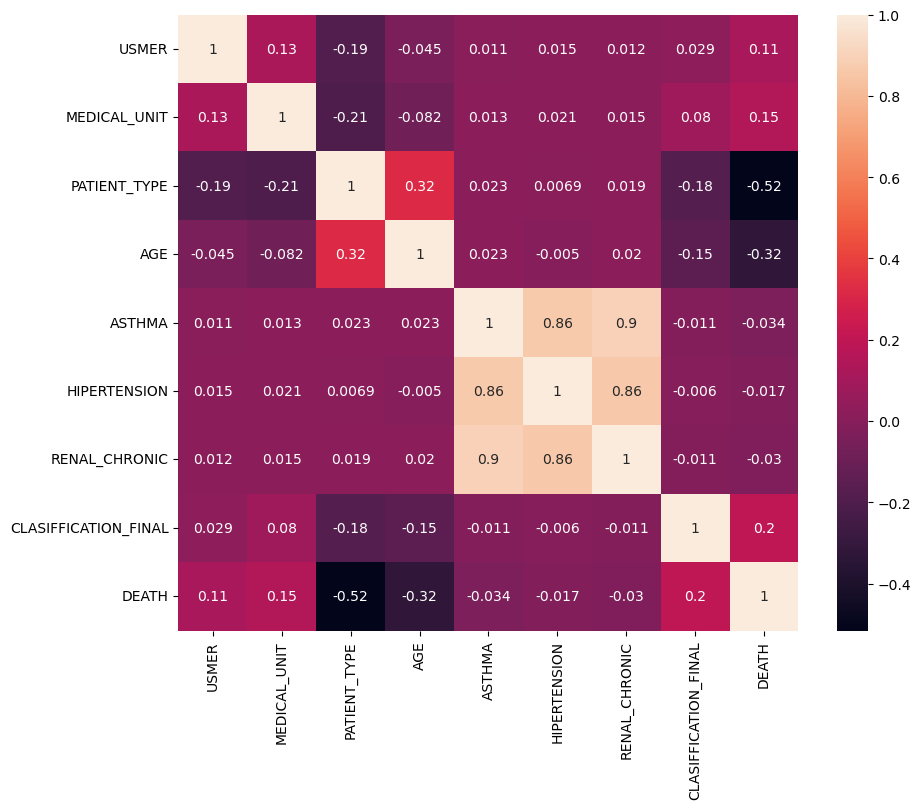

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [13]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,AGE,ASTHMA,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,65,2,1,2,3,1
1,2,1,1,72,2,1,1,5,1
2,2,1,2,55,2,2,2,3,1
3,2,1,1,53,2,2,2,7,1
4,2,1,1,68,2,1,2,3,1


In [14]:
df["DEATH"].value_counts()

2    971633
1     76942
Name: DEATH, dtype: int64

<AxesSubplot:>

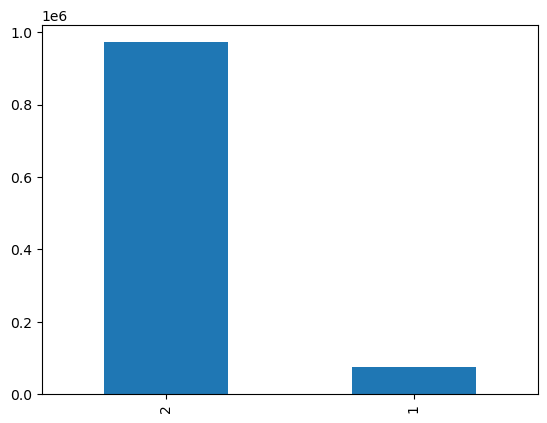

In [16]:
df["DEATH"].value_counts().plot(kind='bar')

<AxesSubplot:>

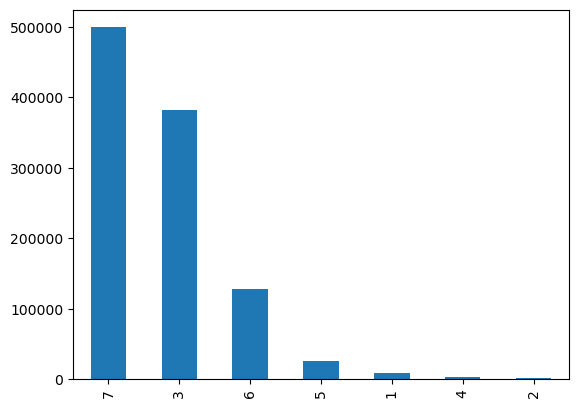

In [19]:
df["CLASIFFICATION_FINAL"].value_counts().plot(kind='bar')	

<AxesSubplot:>

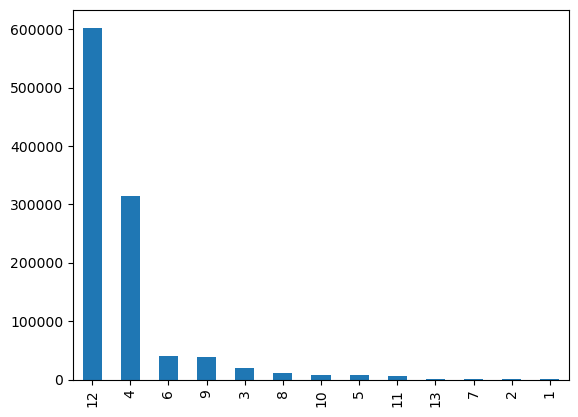

In [51]:
df["MEDICAL_UNIT"].value_counts().plot(kind='bar')

<AxesSubplot:>

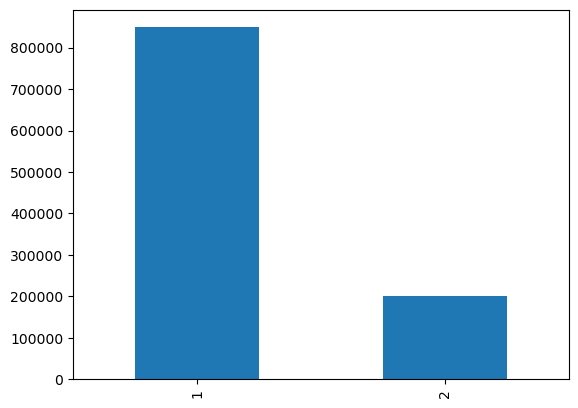

In [52]:
df["PATIENT_TYPE"].value_counts().plot(kind='bar')

In [20]:
df.describe()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,AGE,ASTHMA,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.190765e+00,4.179410e+01,2.242626e+00,2.128989e+00,2.257180e+00,5.305653e+00,1.926622e+00
std,4.822084e-01,3.723278e+00,3.929041e-01,1.690739e+01,5.114089e+00,5.236397e+00,5.135354e+00,1.881165e+00,2.607556e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,4.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,2.000000e+00
75%,2.000000e+00,1.200000e+01,1.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,2.000000e+00


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH, dtype: int64

In [24]:
y.value_counts()

2    971633
1     76942
Name: DEATH, dtype: int64

In [25]:
x.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,AGE,ASTHMA,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL
0,2,1,1,65,2,1,2,3
1,2,1,1,72,2,1,1,5
2,2,1,2,55,2,2,2,3
3,2,1,1,53,2,2,2,7
4,2,1,1,68,2,1,2,3


In [26]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'PATIENT_TYPE', 'AGE', 'ASTHMA',
       'HIPERTENSION', 'RENAL_CHRONIC', 'CLASIFFICATION_FINAL', 'DEATH'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   PATIENT_TYPE          1048575 non-null  int64
 3   AGE                   1048575 non-null  int64
 4   ASTHMA                1048575 non-null  int64
 5   HIPERTENSION          1048575 non-null  int64
 6   RENAL_CHRONIC         1048575 non-null  int64
 7   CLASIFFICATION_FINAL  1048575 non-null  int64
 8   DEATH                 1048575 non-null  int64
dtypes: int64(9)
memory usage: 72.0 MB


In [28]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,AGE,ASTHMA,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,65,2,1,2,3,1
1,2,1,1,72,2,1,1,5,1
2,2,1,2,55,2,2,2,3,1
3,2,1,1,53,2,2,2,7,1
4,2,1,1,68,2,1,2,3,1


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [30]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [31]:
lr.fit(x_train,y_train)

/Users/macbook-pro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
y1=lr.predict(x_test)
y2=dt.predict(x_test)
y3=rf.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [36]:
s1=accuracy_score(y1,y_test)
s2=accuracy_score(y2,y_test)
s3=accuracy_score(y3,y_test)

In [37]:
print("Logistic Regression score:",s1)
print("Decision Tree Classifier score:",s2)
print("RandomForest Classifier score:",s3)

Logistic Regression score: 0.9343871444579548
Decision Tree Classifier score: 0.9348115299334812
RandomForest Classifier score: 0.9362563479007224


In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
cvs1=cross_val_score(lr,x,y,scoring="accuracy")
cvs2=cross_val_score(dt,x,y,scoring="accuracy")
#cvs3=cross_val_score(rf,x,y,scoring="accuracy")

/Users/macbook-pro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/macbook-pro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [40]:
print("Logistic Regression cv score:",np.mean(cvs1))
print("Decision Tree cv score:",np.mean(cvs2))
#print("RandomForest Classifier cv score:",np.mean(cvs3))

Logistic Regression cv score: 0.9009922990725509
Decision Tree cv score: 0.44611782657416016


In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

print("Model Accuracy: ", accuracy_score(y_test, y1))
print(confusion_matrix(y_test, y1))
print(classification_report(y_test, y1))


Model Accuracy:  0.9343871444579548
[[  5903   9587]
 [  4173 190052]]
              precision    recall  f1-score   support

           1       0.59      0.38      0.46     15490
           2       0.95      0.98      0.97    194225

    accuracy                           0.93    209715
   macro avg       0.77      0.68      0.71    209715
weighted avg       0.92      0.93      0.93    209715



In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

print("Model Accuracy: ", accuracy_score(y_test, y2))
print(confusion_matrix(y_test, y2))
print(classification_report(y_test, y2))

Model Accuracy:  0.9348115299334812
[[  6851   8639]
 [  5032 189193]]
              precision    recall  f1-score   support

           1       0.58      0.44      0.50     15490
           2       0.96      0.97      0.97    194225

    accuracy                           0.93    209715
   macro avg       0.77      0.71      0.73    209715
weighted avg       0.93      0.93      0.93    209715



In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

print("Model Accuracy: ", accuracy_score(y_test, y3))
print(confusion_matrix(y_test, y3))
print(classification_report(y_test, y3))

Model Accuracy:  0.9362563479007224
[[  6628   8862]
 [  4506 189719]]
              precision    recall  f1-score   support

           1       0.60      0.43      0.50     15490
           2       0.96      0.98      0.97    194225

    accuracy                           0.94    209715
   macro avg       0.78      0.70      0.73    209715
weighted avg       0.93      0.94      0.93    209715



In [45]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(x,y)

In [46]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (123107, 8)
Test_x : (30777, 8)
Train_y : (123107,)
Test_y : (30777,)


In [47]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

cvs_1=cross_val_score(logreg,x_resampled,y_resampled,scoring="accuracy")
print("cross val score:",np.mean(cvs_1))

Logistic Regression Accuracy : 0.8924521558306527
cross val score: 0.8836070342719358


/Users/macbook-pro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
dtree = DecisionTreeClassifier()
dtree.fit(train_x,train_y)
print("Decision Tree Accuracy :",dtree.score(test_x, test_y))

cvs_2=cross_val_score(dtree,x_resampled,y_resampled,scoring="accuracy")
print("cross val score:",np.mean(cvs_2))

Decision Tree Accuracy : 0.8943041881924814
cross val score: 0.8442984134451204


In [49]:
rforest = RandomForestClassifier()
rforest.fit(train_x,train_y)
print("RandomForest Accuracy :",rforest.score(test_x, test_y))

cvs_3=cross_val_score(rforest,x_resampled,y_resampled,scoring="accuracy")
print("cross val score:",np.mean(cvs_3))

RandomForest Accuracy : 0.8949865159047341
cross val score: 0.8446688076707733
